In [1]:
import numpy as np
import pandas as pd

In [2]:
data = pd.read_csv("/content/self_assessment_data-2.csv")
data

,PM 1,PM 2,Status
0,0.8,6.3,Rejected
1,1.4,8.1,Rejected
2,2.1,7.4,Rejected
3,2.6,14.3,Accepted
4,6.8,12.6,Rejected
5,8.8,9.8,Accepted
6,9.2,11.6,Rejected
7,10.8,9.6,Accepted
8,11.8,9.9,Accepted
9,12.4,6.5,Accepted


In [3]:
X_predictors=data.iloc[:,:2]
y_Class= data.iloc[:,2:]
X_predictors=X_predictors.to_numpy()
y_Class=y_Class.to_numpy()
print(X_predictors)
print(y_Class)

[[ 0.8  6.3]
 [ 1.4  8.1]
 [ 2.1  7.4]
 [ 2.6 14.3]
 [ 6.8 12.6]
 [ 8.8  9.8]
 [ 9.2 11.6]
 [10.8  9.6]
 [11.8  9.9]
 [12.4  6.5]
 [12.8  1.1]
 [14.  19.9]
 [14.2 18.5]
 [15.6 17.4]
 [15.8 12.2]
 [16.6  6.7]
 [17.4  4.5]
 [18.2  6.9]
 [19.   3.4]
 [19.6 11.1]]
[['Rejected']
 ['Rejected']
 ['Rejected']
 ['Accepted']
 ['Rejected']
 ['Accepted']
 ['Rejected']
 ['Accepted']
 ['Accepted']
 ['Accepted']
 ['Rejected']
 ['Rejected']
 ['Rejected']
 ['Rejected']
 ['Rejected']
 ['Accepted']
 ['Accepted']
 ['Accepted']
 ['Rejected']
 ['Accepted']]


In [4]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

y_converted = le.fit_transform(y_Class)

print (y_converted==0,1)

[False False False  True False  True False  True  True  True False False
 False False False  True  True  True False  True] 1


/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [5]:
# Here we split our dataset into training and validation datasets
#print(X_predictors)

x_train = X_predictors[::2,:] # train data set (both predictors)
y_train = y_Class[::2] # train data set (labels)


print(x_train.shape)


x_val = X_predictors[1::2,:] # test data set (both predictors)
print(x_val.shape)

y_val = y_Class[1::2] # test data set (labels)

y_train=y_train.reshape(10,)
print(y_train.shape)


y_val=y_val.reshape(10,)
print(y_val.shape)

(10, 2)
(10, 2)
(10,)
(10,)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

The validation accuracy for k= 1 is  0.7


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

The validation accuracy for k= 2 is  0.9


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

The validation accuracy for k= 3 is  0.4


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

The validation accuracy for k= 4 is  0.7


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

The validation accuracy for k= 5 is  0.3


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

The validation accuracy for k= 6 is  0.3


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

The validation accuracy for k= 7 is  0.3


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

The validation accuracy for k= 8 is  0.3


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

The validation accuracy for k= 9 is  0.3


<IPython.core.display.Javascript object>

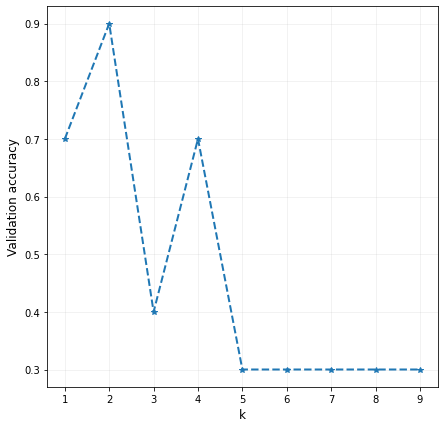

In [10]:
from google.colab import widgets
from sklearn import neighbors
import matplotlib.pyplot as plt
#from matplotlib.colors import ListedColormap

k_values = range(1,10,1)
tb = widgets.TabBar([str(k) for k in k_values])

#cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])

accuracy = dict.fromkeys(k_values)

for k in k_values:
  with tb.output_to(str(k), select= (k < 2)):

    # First we create the kNN model
    knn = neighbors.KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)



    # Finally we calculate the validation accuracy
    y_val_pred = knn.predict(x_val)
    accuracy[k] = np.sum(y_val==y_val_pred)/len(y_val)

    print("The validation accuracy for k=", k, "is ", accuracy[k])


# Here we predict the value of the validation accuracy as a function of k
plt.figure(figsize=(7, 7))
plt.plot(k_values, list(accuracy.values()), '--*', linewidth=2)
plt.xlabel("k", fontsize=12)
plt.ylabel("Validation accuracy", fontsize=12)
plt.grid(alpha=0.2)
plt.show()

In [11]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=2)

# Train the model using the training sets
model.fit(X_predictors,y_Class)

#Predict Output
predicted= model.predict([[1,2]]) 
print(predicted)

['Rejected']


/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
